### 1. Load train datasets

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import pickle
from sklearn.metrics import r2_score
from keras.models import model_from_json
from matplotlib import pyplot as plt
with open('df_train.pickle', 'rb') as file:
    df_train = pickle.load(file)
df_train

,value,xy
0,"[129.0, 159.0, 84.0, 127.0, 146.0, 181.0, 18.0...","[2.87, 2.09]"
1,"[127.0, 158.0, 91.0, 129.0, 149.0, 186.0, 36.0...","[2.73, 2.23]"
2,"[129.0, 145.0, 107.0, 129.0, 146.0, 169.0, 74....","[2.77, 2.83]"
3,"[125.0, 144.0, 108.0, 128.0, 144.0, 165.0, 74....","[2.86, 2.87]"
4,"[132.0, 153.0, 101.0, 129.0, 152.0, 189.0, 62....","[2.54, 2.5]"
...,...,...
14995,"[130.0, 150.0, 104.0, 131.0, 153.0, 183.0, 70....","[2.52, 2.64]"
14996,"[128.0, 150.0, 99.0, 128.0, 147.0, 174.0, 49.0...","[2.86, 2.46]"
14997,"[126.0, 172.0, 91.0, 124.0, 165.0, 229.0, 69.0...","[2.23, 2.01]"
14998,"[125.0, 151.0, 106.0, 126.0, 154.0, 186.0, 76....","[2.38, 2.7]"


In [2]:
XX = df_train['value']
YY = df_train['xy']
X = np.array(XX[0],ndmin=2)
Y = np.array(YY[0],ndmin=2)
for i in range(1,len(XX)):
    dx = np.array(XX[i],ndmin=2) 
    X = np.append(X,dx,axis = 0)
    dy = np.array(YY[i],ndmin=2) 
    Y = np.append(Y,dy,axis = 0)

### 2. Define and training DNN

In [3]:
model1 = Sequential([Dense(14, kernel_initializer='normal', activation='relu', input_shape=(12,), name="hidden_1"),
    Dense(2, kernel_initializer='normal', name="output")])
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model1.fit(X, Y, batch_size=3, epochs=20)

Epoch 1/20
5000/5000 [==============================] - 6s 1000us/step - loss: 0.0492 - mae: 0.1379
Epoch 2/20
5000/5000 [==============================] - 5s 957us/step - loss: 0.0102 - mae: 0.0816
Epoch 3/20
5000/5000 [==============================] - 5s 968us/step - loss: 0.0076 - mae: 0.0704
Epoch 4/20
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0070 - mae: 0.0675
Epoch 5/20
5000/5000 [==============================] - 5s 964us/step - loss: 0.0067 - mae: 0.0662
Epoch 6/20
5000/5000 [==============================] - 5s 965us/step - loss: 0.0063 - mae: 0.0645
Epoch 7/20
5000/5000 [==============================] - 5s 979us/step - loss: 0.0062 - mae: 0.0640
Epoch 8/20
5000/5000 [==============================] - 5s 978us/step - loss: 0.0060 - mae: 0.0630
Epoch 9/20
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0057 - mae: 0.0615
Epoch 10/20
5000/5000 [==============================] - 5s 978us/step - loss: 0.0056 - mae: 0.0609
Epoch 11/20


### 3. Test model

In [4]:
with open('df_test.pickle', 'rb') as file:
    df_test = pickle.load(file)
XX = df_test['value']
YY = df_test['xy']
X = np.array(XX[0],ndmin=2)
Y = np.array(YY[0],ndmin=2)
for i in range(1,len(XX)):
    dx = np.array(XX[i],ndmin=2) 
    X = np.append(X,dx,axis = 0)
    dy = np.array(YY[i],ndmin=2) 
    Y = np.append(Y,dy,axis = 0)

In [5]:
model1.predict(X)

array([[2.7235377, 2.972447 ],
       [3.042646 , 2.23138  ],
       [2.1723938, 2.9318736],
       ...,
       [2.8591943, 2.554686 ],
       [2.5321112, 2.8780088],
       [2.9785895, 3.04956  ]], dtype=float32)

In [6]:
model1_predict = model1.predict(X)

In [7]:
print('r2_score = {}'.format(r2_score(Y,model1_predict)))

r2_score = 0.9071975975509872


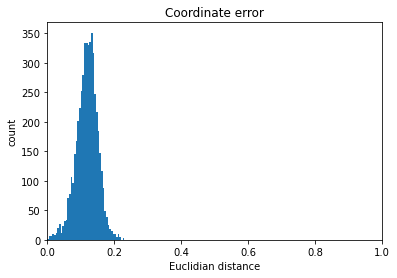

In [8]:
result_test = []
for i in range(0,len(model1_predict)):
    dist = np.sqrt(sum(pow(a-b, 2) for a, b in zip(model1_predict[i], Y[i])))
    result_test.append(dist)
bins = np.arange(0, 1, 0.005)
plt.xlim(0, 1)
plt.hist(result_test, bins=bins)
plt.title('Сoordinate error')
plt.xlabel('Euclidian distance')
plt.ylabel('count')
plt.show()

### 4. Save model

In [9]:
model1_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)